4 10
{(0, 1): 41, (0, 3): 56, (0, 2): 100, (1, 1): 75, (1, 2): 29, (1, 3): 6, (3, 2): 9, (3, 3): 50}


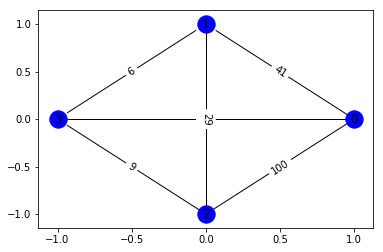

['1 <--> 3, weight: 6', '2 <--> 3, weight: 9', '0 <--> 1, weight: 41']
['1 <--> 3, weight: 6', '2 <--> 3, weight: 9', '0 <--> 1, weight: 41']


In [5]:
from EdgeWeightedGraph import EdgeWeightedGraph
from Edge import Edge
import sys
sys.path.append("C:/Users/cawei/Algorithms/UnionFind")  
from UnionFind import UnionFind
import random


class KruskalMST(object):
    
    def __init__(self, g):
        self._g = g
        self._mst = None
        self._weight = 0
        self._computeMst()
        self._validate()
        
    def weight(self):
        return self._weight
    
    def mst(self):
        return self._mst;
    
    def _computeMst(self):
        cut = UnionFind(self._g.vertices())
        self._mst = []
        sortedEdges = sorted([edge for v in range(self._g.vertices()) for edge in self._g.adjacent(v) ])
        edge = 0
        for i, edge in enumerate(sortedEdges):
            if len(self._mst) == self._g.vertices() - 1:
                break
            v = edge.either()
            w = edge.other(v)
            if cut.connected(v, w):
                continue
            cut.union(v, w)
            self._mst.append(edge)
            self._weight += edge._weight

    def _validate(self):
        #Check weight 
        totalWeight = sum([e.weight() for e in self.mst()])
        assert self.weight() == totalWeight
        
        #Check acyclic
        cut = UnionFind(self._g.vertices())
        for edge in self.mst():
            v = edge.either()
            w = edge.other(v)
            assert not cut.connected(v, w) 
            cut.union(v, w)
        
        #Check spanning
        assert len(set([cut.find(v) for v in range(g.vertices())])) == 1
            
        #Check minimal weight
        MST = self.mst()
        print([str(x) for x in MST])
        for edge in MST:
            v = edge.either()
            w = edge.other(v)
            for otherEdge in [e for e in self._g.adjacent(v) if e not in MST and e.other(e.either()) != e.either()]:
                assert edge.weight() <= otherEdge.weight(), "Edge {} was greater than alternative {}".format(str(edge), str(otherEdge))
                
                

if __name__ == "__main__":
    nodes = random.randint(1, 5)
    edges = random.randint(0, nodes **2)
    #edges = nodes - 1
    print(nodes, edges)
    g = EdgeWeightedGraph.generateRandomGraph(nodes, edges)
    g.displayGraph()
    kruskalMST = KruskalMST(g)
    print([str(e) for e in kruskalMST.mst()])
        
        
        
    
        